In [1]:
import torch
import pickle
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.preprocessing import StandardScaler

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [3]:
with open('./Gradients/DistilBERT/Wiki/fisher.pkl','rb') as fp:
    wiki = pickle.load(fp)
with open('./Gradients/DistilBERT/Arith/fisher.pkl','rb') as fp:
    arith = pickle.load(fp)
with open('./Gradients/DistilBERT/CoLA/fisher.pkl','rb') as fp:
    cola = pickle.load(fp)
with open('./Gradients/DistilBERT/MRPC/fisher.pkl','rb') as fp:
    mrpc = pickle.load(fp)

In [4]:
wiki_self1 = torch.cat([wiki[4], wiki[6], wiki[8], wiki[10]])
wiki_self1 = wiki_self1.detach().cpu().numpy()

wiki_self2 = torch.cat([wiki[20], wiki[22], wiki[24], wiki[26]])
wiki_self2 = wiki_self2.detach().cpu().numpy()

wiki_self3 = torch.cat([wiki[36], wiki[38], wiki[40], wiki[42]])
wiki_self3 = wiki_self3.detach().cpu().numpy()

wiki_self4 = torch.cat([wiki[52], wiki[54], wiki[56], wiki[58]])
wiki_self4 = wiki_self4.detach().cpu().numpy()

wiki_self5 = torch.cat([wiki[68], wiki[70], wiki[72], wiki[74]])
wiki_self5 = wiki_self5.detach().cpu().numpy()

wiki_self6 = torch.cat([wiki[84], wiki[86], wiki[88], wiki[90]])
wiki_self6 = wiki_self6.detach().cpu().numpy()

In [5]:
arith_self1 = torch.cat([arith[4], arith[6], arith[8], arith[10]])
arith_self1 = arith_self1.detach().cpu().numpy()

arith_self2 = torch.cat([arith[20], arith[22], arith[24], arith[26]])
arith_self2 = arith_self2.detach().cpu().numpy()

arith_self3 = torch.cat([arith[36], arith[38], arith[40], arith[42]])
arith_self3 = arith_self3.detach().cpu().numpy()

arith_self4 = torch.cat([arith[52], arith[54], arith[56], arith[58]])
arith_self4 = arith_self4.detach().cpu().numpy()

arith_self5 = torch.cat([arith[68], arith[70], arith[72], arith[74]])
arith_self5 = arith_self5.detach().cpu().numpy()

arith_self6 = torch.cat([arith[84], arith[86], arith[88], arith[90]])
arith_self6 = arith_self6.detach().cpu().numpy()

In [6]:
cola_self1 = torch.cat([cola[4], cola[6], cola[8], cola[10]])
cola_self1 = cola_self1.detach().cpu().numpy()

cola_self2 = torch.cat([cola[20], cola[22], cola[24], cola[26]])
cola_self2 = cola_self2.detach().cpu().numpy()

cola_self3 = torch.cat([cola[36], cola[38], cola[40], cola[42]])
cola_self3 = cola_self3.detach().cpu().numpy()

cola_self4 = torch.cat([cola[52], cola[54], cola[56], cola[58]])
cola_self4 = cola_self4.detach().cpu().numpy()

cola_self5 = torch.cat([cola[68], cola[70], cola[72], cola[74]])
cola_self5 = cola_self5.detach().cpu().numpy()

cola_self6 = torch.cat([cola[84], cola[86], cola[88], cola[90]])
cola_self6 = cola_self6.detach().cpu().numpy()

In [7]:
mrpc_self1 = torch.cat([mrpc[4], mrpc[6], mrpc[8], mrpc[10]])
mrpc_self1 = mrpc_self1.detach().cpu().numpy()

mrpc_self2 = torch.cat([mrpc[20], mrpc[22], mrpc[24], mrpc[26]])
mrpc_self2 = mrpc_self2.detach().cpu().numpy()

mrpc_self3 = torch.cat([mrpc[36], mrpc[38], mrpc[40], mrpc[42]])
mrpc_self3 = mrpc_self3.detach().cpu().numpy()

mrpc_self4 = torch.cat([mrpc[52], mrpc[54], mrpc[56], mrpc[58]])
mrpc_self4 = mrpc_self4.detach().cpu().numpy()

mrpc_self5 = torch.cat([mrpc[68], mrpc[70], mrpc[72], mrpc[74]])
mrpc_self5 = mrpc_self5.detach().cpu().numpy()

mrpc_self6 = torch.cat([mrpc[84], mrpc[86], mrpc[88], mrpc[90]])
mrpc_self6 = mrpc_self6.detach().cpu().numpy()

In [91]:
arith1_1000 = np.argpartition(-arith_self1.ravel(),800)[:800]
get = np.column_stack(np.unravel_index(arith1_1000, arith_self1.shape))

cola_1_1000 = np.take(cola_self1, np.ravel_multi_index(get.T, cola_self1.shape)).T
mrpc_1_1000 = np.take(mrpc_self1, np.ravel_multi_index(get.T, mrpc_self1.shape)).T

Text(0, 0.5, "Fischer's Information Sensitivity")

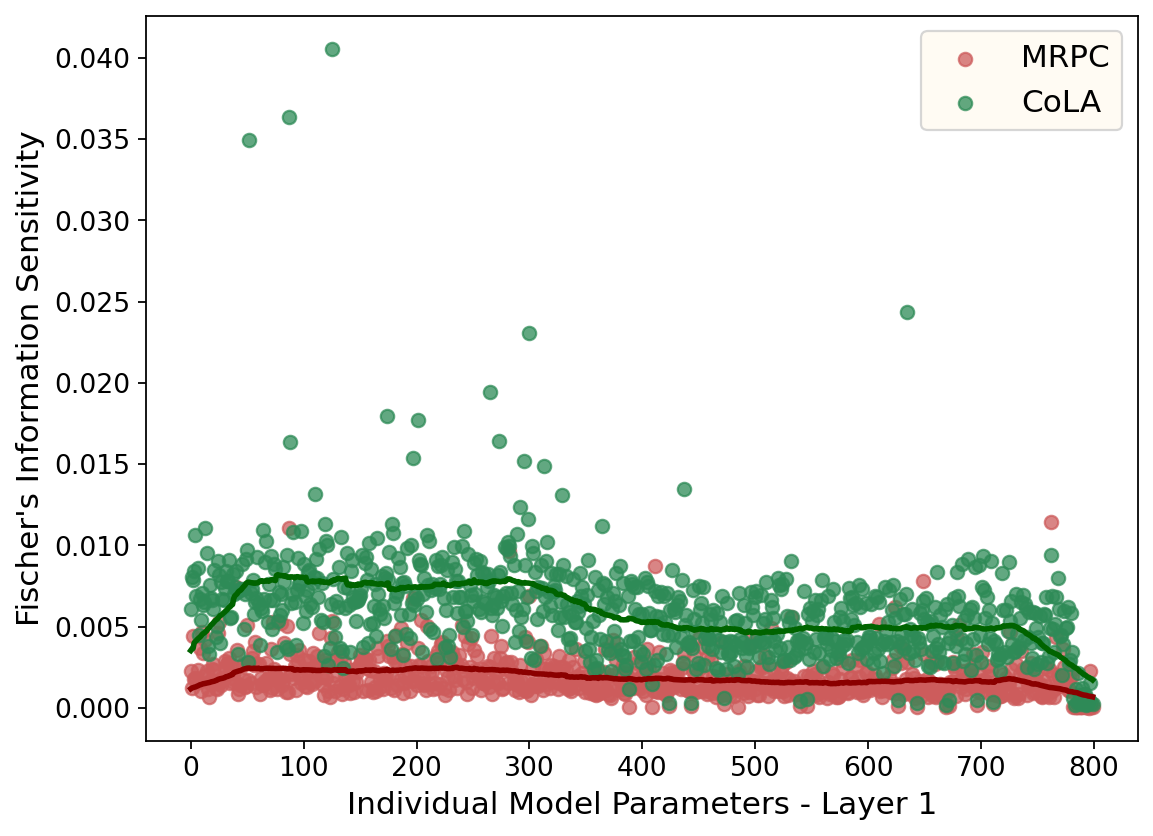

In [106]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=160)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.scatter(range(len(arith1_1000)), mrpc_1_1000, c = 'indianred', alpha = 0.75, label='MRPC')
ax.plot(range(len(arith1_1000)), np.convolve(mrpc_1_1000, np.ones(100)/100, mode='same'), c = 'darkred', linewidth = 2.5)
plt.scatter(range(len(arith1_1000)), cola_1_1000, c = 'seagreen', alpha = 0.75, label='CoLA')
ax.plot(range(len(arith1_1000)), np.convolve(cola_1_1000, np.ones(100)/100, mode='same'), c = 'darkgreen', linewidth = 2.5)

ax.legend(loc = "upper right" ,facecolor='floralwhite', prop={'size': 14})
plt.xlabel("Individual Model Parameters - Layer 1", fontsize= 14)
plt.ylabel("Fischer's Information Sensitivity", fontsize= 14)

Text(0, 0.5, "Fischer's Information Sensitivity")

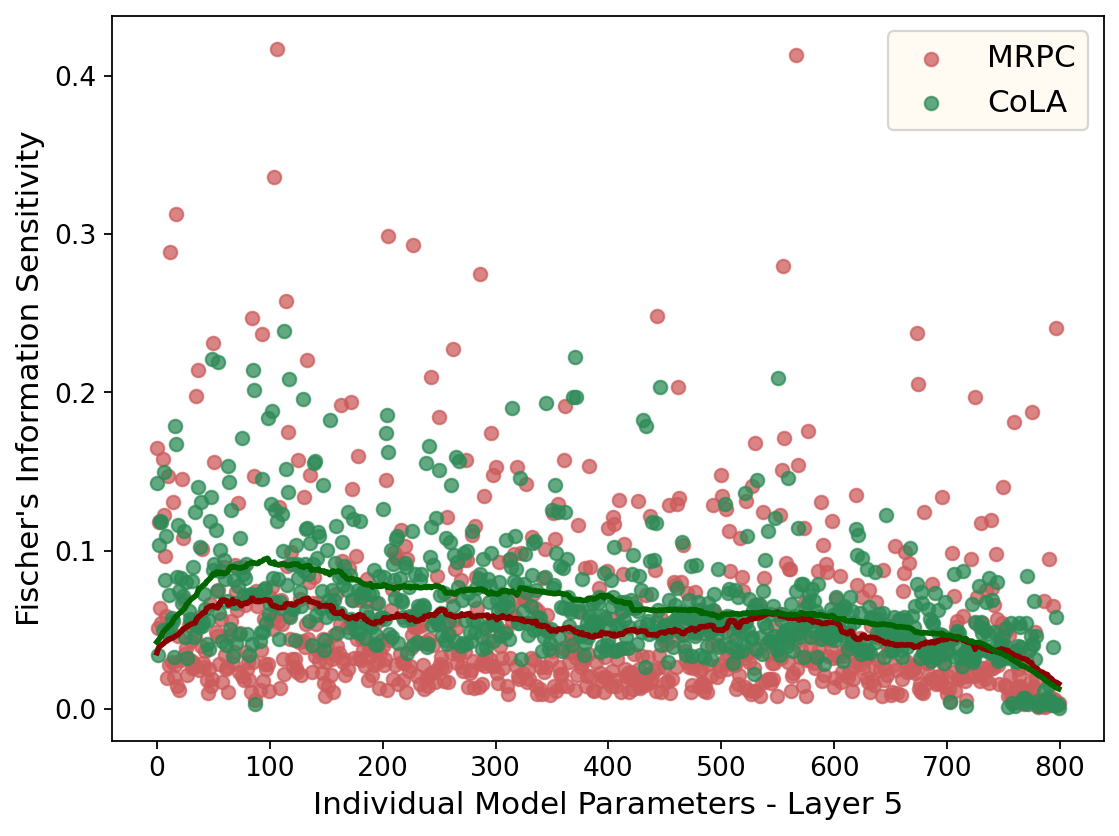

In [109]:
arith5_1000 = np.argpartition(-arith_self5.ravel(),800)[:800]
get = np.column_stack(np.unravel_index(arith5_1000, arith_self5.shape))

cola_5_1000 = np.take(cola_self5, np.ravel_multi_index(get.T, cola_self5.shape)).T
mrpc_5_1000 = np.take(mrpc_self5, np.ravel_multi_index(get.T, mrpc_self5.shape)).T

fig, ax = plt.subplots(figsize=(8, 6), dpi=160)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.scatter(range(len(arith5_1000)), mrpc_5_1000, c = 'indianred', alpha = 0.75, label='MRPC')
ax.plot(range(len(arith5_1000)), np.convolve(mrpc_5_1000, np.ones(100)/100, mode='same'), c = 'darkred', linewidth = 2.5)
plt.scatter(range(len(arith5_1000)), cola_5_1000, c = 'seagreen', alpha = 0.75, label='CoLA')
ax.plot(range(len(arith5_1000)), np.convolve(cola_5_1000, np.ones(100)/100, mode='same'), c = 'darkgreen', linewidth = 2.5)

ax.legend(loc = "upper right" ,facecolor='floralwhite', prop={'size': 14})
plt.xlabel("Individual Model Parameters - Layer 5", fontsize= 14)
plt.ylabel("Fischer's Information Sensitivity", fontsize= 14)